## 1. Downloading, importing necessary package and getting data

In [3]:
%pip install pandas 
%pip install matplotlib
%pip install numpy
%pip install seaborn 

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

In [5]:
Application_Record_Data = pd.read_csv('application_record.csv')
Credit_record = pd.read_csv('credit_record.csv')

## 2. Data Cleaning and Preprocessing

### 2.1 Application Record Data

#### 2.1.1 Data Cleaning 

In [6]:
print("Application Record Info:")
print("Shape:", Application_Record_Data.shape)
print(Application_Record_Data.head())

Application Record Info:
Shape: (438557, 18)
        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        C

In [7]:
Application_Record_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [8]:
sum(Application_Record_Data.duplicated() == True)
#no duplicated rows 

0

In [9]:
Application_Record_Data.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

An initial data quality check reveals that OCCUPATION_TYPE is the only column with missing values. To decide on a handling strategy, we first need to understand the extent of the issue.

In [10]:
total_count = len(Application_Record_Data)
percentage_missing = (Application_Record_Data['OCCUPATION_TYPE'].isnull().sum()/ total_count) * 100
print(f"Percentage of missing values: {percentage_missing:.2f}%")
print(Application_Record_Data['OCCUPATION_TYPE'].value_counts())

Percentage of missing values: 30.60%
OCCUPATION_TYPE
Laborers                 78240
Core staff               43007
Sales staff              41098
Managers                 35487
Drivers                  26090
High skill tech staff    17289
Accountants              15985
Medicine staff           13520
Cooking staff             8076
Security staff            7993
Cleaning staff            5845
Private service staff     3456
Low-skill Laborers        2140
Secretaries               2044
Waiters/barmen staff      1665
Realty agents             1041
HR staff                   774
IT staff                   604
Name: count, dtype: int64


With 30.6% of OCCUPATION_TYPE values missing, deleting these rows would severely compromise the dataset's integrity. To preserve all records and maintain the structural integrity of the data, we will impute these missing entries with 'Unknown'. This strategy ensures no data is lost and treats the absence of this information as a distinct category for analysis.

In [11]:
#replacing the missing values
Application_Record_Data['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)

/var/folders/s2/8t1jxlwd2v3592kx4gh1xvjh0000gn/T/ipykernel_56661/2808447467.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Application_Record_Data['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)


In [12]:
#checking if there are any missing valus left
Application_Record_Data.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

From above, we can see that some of the columns have a data type, such as object or int64, that does not accurately represent their underlying categorical nature. Columns like CODE_GENDER, FLAG_OWN_CAR, and the various flags represent distinct groups or binary states, not numerical quantities. Therefore, we will convert them to the category data type. This is a crucial step for both memory optimization and ensuring these features are treated correctly during visualization and analysis

In [13]:
categorical_cols = [
    'CODE_GENDER',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE',
    'OCCUPATION_TYPE',
    'FLAG_MOBIL',
    'FLAG_WORK_PHONE',
    'FLAG_PHONE',
    'FLAG_EMAIL'
]

for col in categorical_cols:
    Application_Record_Data[col] = Application_Record_Data[col].astype('category')

Application_Record_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   ID                   438557 non-null  int64   
 1   CODE_GENDER          438557 non-null  category
 2   FLAG_OWN_CAR         438557 non-null  category
 3   FLAG_OWN_REALTY      438557 non-null  category
 4   CNT_CHILDREN         438557 non-null  int64   
 5   AMT_INCOME_TOTAL     438557 non-null  float64 
 6   NAME_INCOME_TYPE     438557 non-null  category
 7   NAME_EDUCATION_TYPE  438557 non-null  category
 8   NAME_FAMILY_STATUS   438557 non-null  category
 9   NAME_HOUSING_TYPE    438557 non-null  category
 10  DAYS_BIRTH           438557 non-null  int64   
 11  DAYS_EMPLOYED        438557 non-null  int64   
 12  FLAG_MOBIL           438557 non-null  category
 13  FLAG_WORK_PHONE      438557 non-null  category
 14  FLAG_PHONE           438557 non-null  category
 15  

#### 2.1.2 Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Distribution of Total Income (Applicants)')

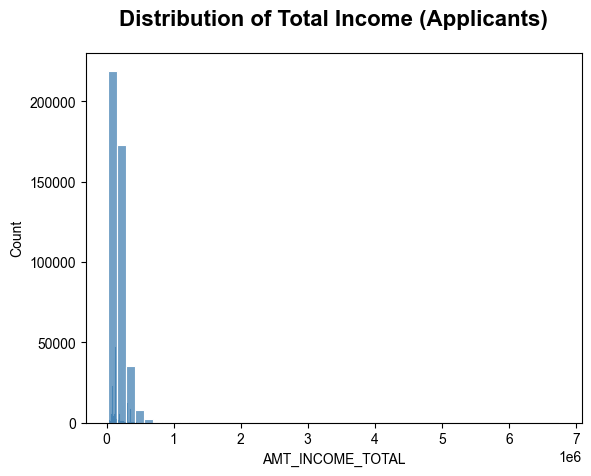

In [ ]:
sns.set_theme(style="whitegrid")

sns.histplot(Application_Record_Data, 
             x = 'AMT_INCOME_TOTAL',
             bins=50,              
             color='steelblue', 
             edgecolor='white', 
             linewidth=0.8)

plt.title(
    'Distribution of Total Income (Applicants)',
    fontsize=16,
    fontweight='bold',
    pad=20)

In [15]:
print(Application_Record_Data.AMT_INCOME_TOTAL.min())
print(Application_Record_Data.AMT_INCOME_TOTAL.max())


26100.0
6750000.0


While the histogram for AMT_INCOME_TOTAL might seem unusual, its shape is a classic example of a highly right-skewed distribution. The root cause is the vast scale of the data, driven by significant outliers. To illustrate, the income data spans from a minimum of 26100 to 6750000. This huge disparity forces the plot's axis to accommodate these very high values, which in turn compresses the visualization of the more densely populated, lower-income brackets. Since we understand that machine learning models, particularly those sensitive to feature scale like k-Nearest Neighbours, will not perform well with such skewed data. Hence, we have to do further feature engineering on this column in later segment.

Text(0.5, 1.0, 'Distribution of Days Birth (Applicants)')

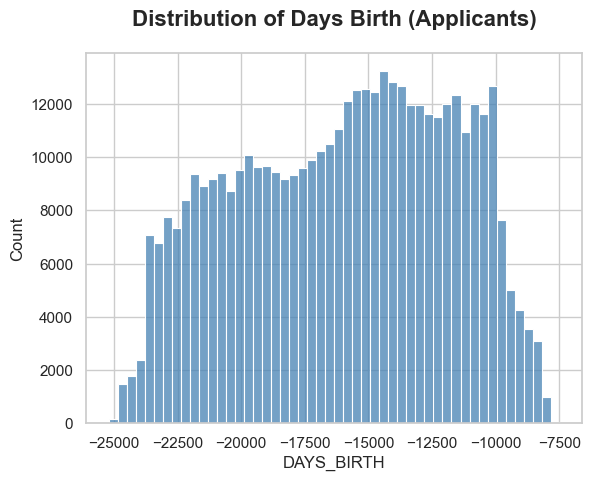

In [38]:
sns.set_theme(style="whitegrid")

sns.histplot(Application_Record_Data, 
             x = 'DAYS_BIRTH',
             bins=50,              
             color='steelblue', 
             edgecolor='white', 
             linewidth=0.8)

plt.title(
    'Distribution of Days Birth (Applicants)',
    fontsize=16,
    fontweight='bold',
    pad=20)

While the raw values in this feature are large, the primary issue is their lack of interpretability. Therefore, we have to do further feature engineering step which is to transform these 'day' values into 'years', which will provide a more meaningful scale for both analysis and modeling. Furthermore, by dividing these values by 365, we will also eventually decrease the scale.

Text(0.5, 1.0, 'Distribution of Days Birth (Applicants)')

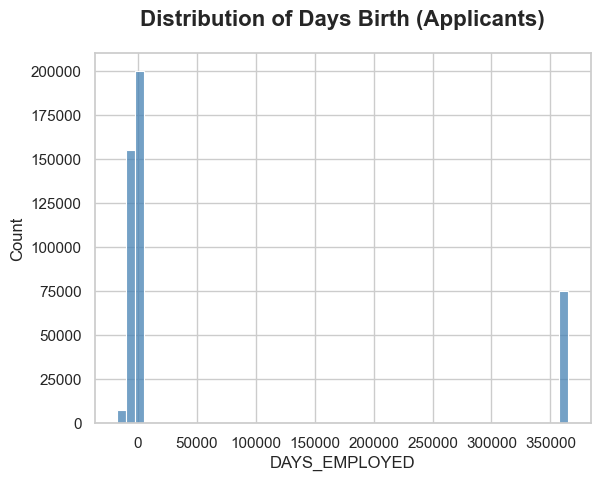

In [42]:
sns.set_theme(style="whitegrid")

sns.histplot(Application_Record_Data, 
             x = 'DAYS_EMPLOYED',
             bins=50,              
             color='steelblue', 
             edgecolor='white', 
             linewidth=0.8)

plt.title(
    'Distribution of Days Birth (Applicants)',
    fontsize=16,
    fontweight='bold',
    pad=20)

/var/folders/s2/8t1jxlwd2v3592kx4gh1xvjh0000gn/T/ipykernel_56661/2653466715.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(Application_Record_Data, x = 'CODE_GENDER', palette = 'deep', edgecolor='black')


Text(0.5, 0, 'Gender')

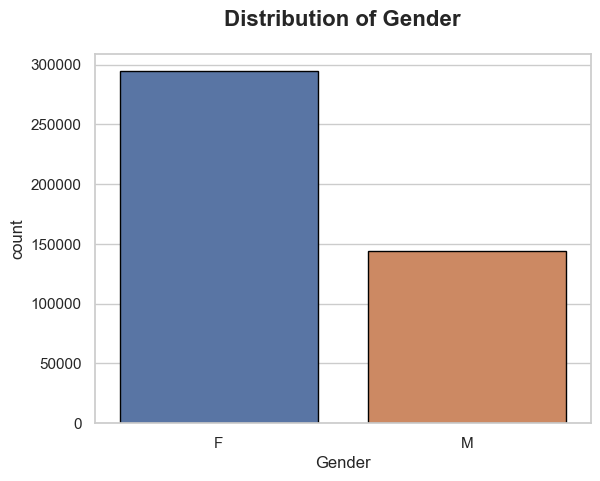

In [32]:
sns.countplot(Application_Record_Data, x = 'CODE_GENDER', palette = 'deep', edgecolor='black')

plt.title(
    'Distribution of Gender',
    fontsize=16,
    fontweight='bold',
    pad=20)

plt.xlabel('Gender')

/var/folders/s2/8t1jxlwd2v3592kx4gh1xvjh0000gn/T/ipykernel_56661/1406053178.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(Application_Record_Data, x = 'NAME_INCOME_TYPE', palette = 'deep', edgecolor='black')


Text(0.5, 0, 'Income Type')

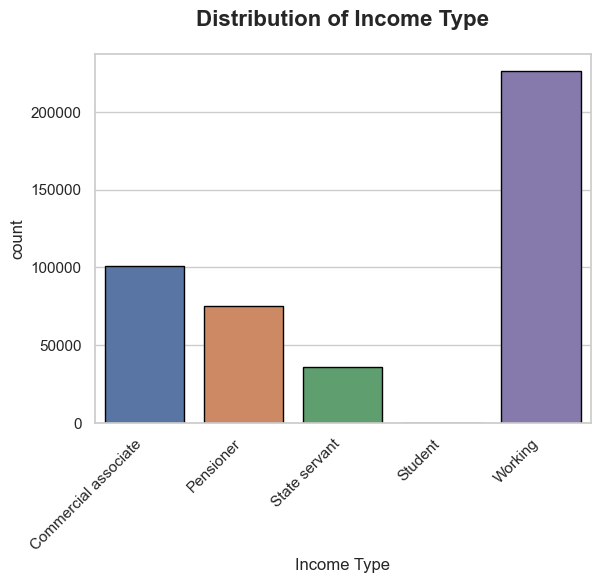

In [33]:
sns.countplot(Application_Record_Data, x = 'NAME_INCOME_TYPE', palette = 'deep', edgecolor='black')

plt.xticks(rotation=45, ha='right')

plt.title(
    'Distribution of Income Type',
    fontsize=16,
    fontweight='bold',
    pad=20)

plt.xlabel('Income Type')

/var/folders/s2/8t1jxlwd2v3592kx4gh1xvjh0000gn/T/ipykernel_56661/3988340868.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(Application_Record_Data, x = 'NAME_EDUCATION_TYPE', palette = 'deep', edgecolor='black')


Text(0.5, 0, 'Education Type')

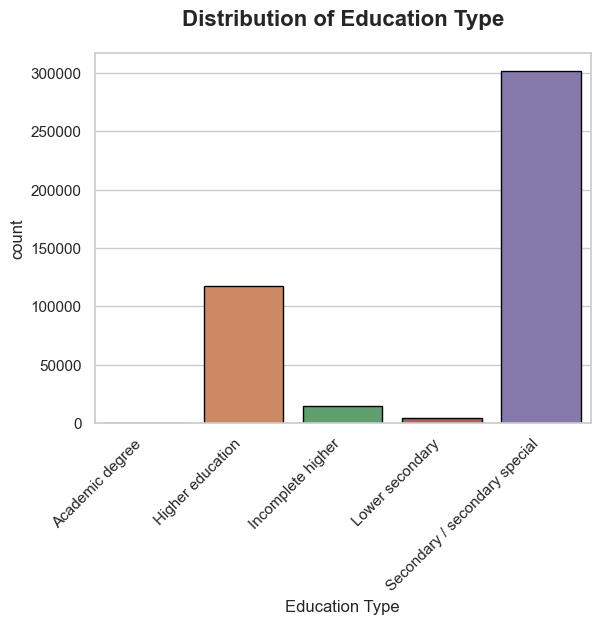

In [34]:
sns.countplot(Application_Record_Data, x = 'NAME_EDUCATION_TYPE', palette = 'deep', edgecolor='black')

plt.title(
    'Distribution of Education Type',
    fontsize=16,
    fontweight='bold',
    pad=20)

plt.xticks(rotation=45, ha='right')

plt.xlabel('Education Type')

/var/folders/s2/8t1jxlwd2v3592kx4gh1xvjh0000gn/T/ipykernel_56661/4107261705.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(Application_Record_Data, x = 'NAME_FAMILY_STATUS', palette = 'deep', edgecolor='black')


Text(0.5, 0, 'Family Status')

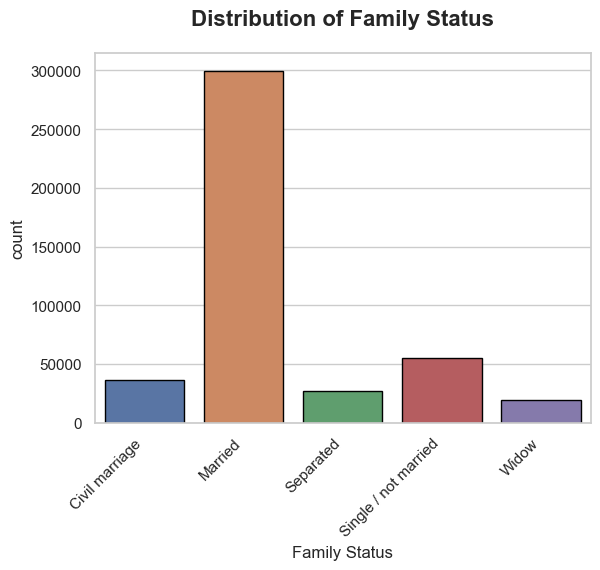

In [35]:
sns.countplot(Application_Record_Data, x = 'NAME_FAMILY_STATUS', palette = 'deep', edgecolor='black')

plt.xticks(rotation=45, ha='right')

plt.title(
    'Distribution of Family Status',
    fontsize=16,
    fontweight='bold',
    pad=20)

plt.xlabel('Family Status')

/var/folders/s2/8t1jxlwd2v3592kx4gh1xvjh0000gn/T/ipykernel_56661/1235526201.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(Application_Record_Data, x = 'NAME_HOUSING_TYPE', palette = 'deep', edgecolor='black')


Text(0.5, 0, 'Housing Type')

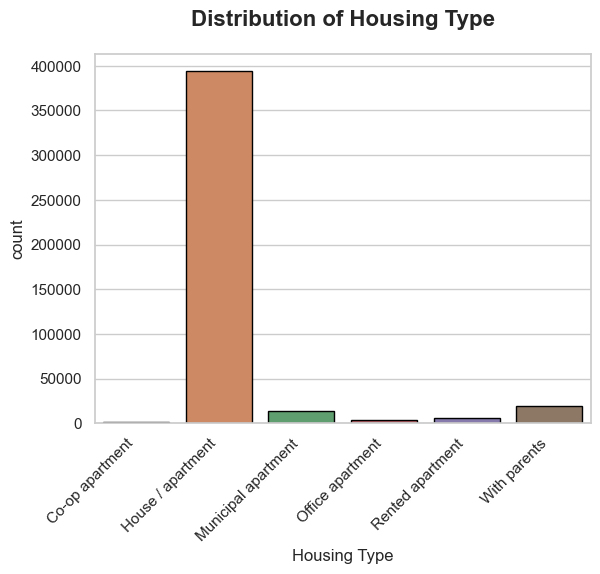

In [36]:
sns.countplot(Application_Record_Data, x = 'NAME_HOUSING_TYPE', palette = 'deep', edgecolor='black')

plt.xticks(rotation=45, ha='right')

plt.title(
    'Distribution of Housing Type',
    fontsize=16,
    fontweight='bold',
    pad=20)

plt.xlabel('Housing Type')

#### 2.1.3 Feature Engineering

Now, we will be applying feature engineering on some columns, specifically the AMT_INCOME_TOTAL column to address the skewed distribution and the DAYS_BIRTH column to convert the raw data into days to scale down the range and better interpretability.

Text(0.5, 1.0, 'Distribution of Log-Transformed Total Income (Applicants)')

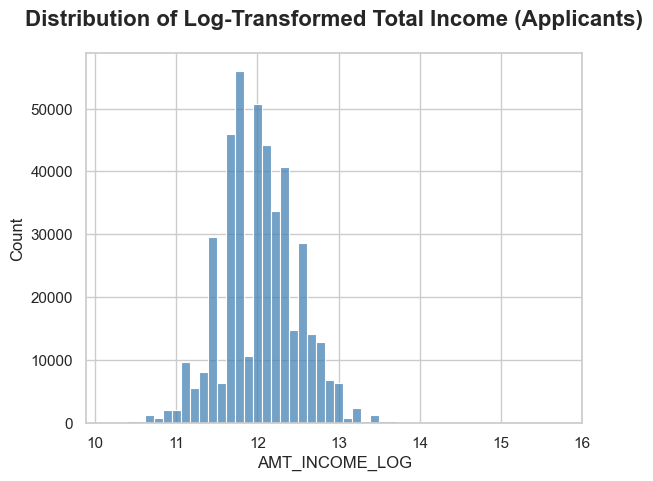

In [17]:
Application_Record_Data['AMT_INCOME_LOG'] = np.log1p(Application_Record_Data['AMT_INCOME_TOTAL'])

sns.set_theme(style="whitegrid")

sns.histplot(Application_Record_Data, 
             x = 'AMT_INCOME_LOG',
             bins=50,               
             color='steelblue', 
             edgecolor='white', 
             linewidth=0.8)

plt.title(
    'Distribution of Log-Transformed Total Income (Applicants)',
    fontsize=16,
    fontweight='bold',
    pad=20)


After applying the logarithm transformation, the new histogram is now approximately normal. As seen in the histogram, this transformation effectively mitigates the impact of extreme outliers and provides a much clearer view of the central tendency and spread of applicant incomes, making it a more suitable feature for our predictive models.

In [39]:
Application_Record_Data['AGE_YEARS'] = Application_Record_Data['DAYS_BIRTH'] / -365.25 #for leap year

Application_Record_Data['AGE_YEARS'] = Application_Record_Data['AGE_YEARS'].astype(int)

print(Application_Record_Data[['DAYS_BIRTH', 'AGE_YEARS']].head())

   DAYS_BIRTH  AGE_YEARS
0      -12005         32
1      -12005         32
2      -21474         58
3      -19110         52
4      -19110         52


Text(0, 0.5, 'Number of Applicants')

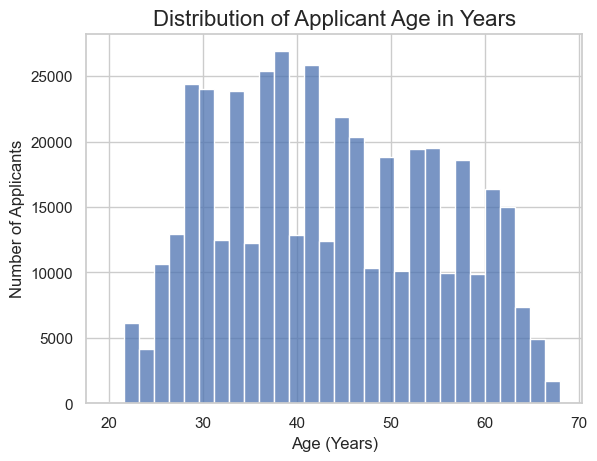

In [41]:
sns.histplot(data=Application_Record_Data, x='AGE_YEARS', bins=30)
plt.title('Distribution of Applicant Age in Years', fontsize=16)
plt.xlabel('Age (Years)')
plt.ylabel('Number of Applicants')

From the plot, we can see that the scale is smaller now and it is more interpretable than before where the vast majority of applicants lie between early 20 to late 60s. 

### 2.2 Credit Record Data

#### 2.2.1. Data Cleaning

#### 2.2.2 Exploratory Data Analysis (EDA)

#### 2.2.3 Feature Engineering

Based on global credit scoring standards such as the FICO score, any credit payment that is more than 30 days past due has a negative impact on an individual's credit score. Therefore, within our credit record table, we classify customers with a status of 2, 3, 4, or 5 as 'bad' or 'high-risk' clients, as these indicate a history of significant delinquency.

In [18]:
bad_statuses = ['2', '3', '4', '5']
Credit_record['IS_BAD_CLIENT'] = Credit_record['STATUS'].isin(bad_statuses).astype(int)
Credit_Target = Credit_record.groupby('ID')['IS_BAD_CLIENT'].max().reset_index()